# Dia 1 Ingesta de datos

In [1]:
!pip install opendatasets
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Traemos los datos desde kaggle

In [2]:
datasetlink = "https://www.kaggle.com/datasets/mrsimple07/salary-prediction-data"
od.download(datasetlink)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kidkeozz
Your Kaggle Key: ··········


100%|██████████| 16.2k/16.2k [00:00<00:00, 20.7MB/s]

In [3]:
os.chdir("salary-prediction-data")
os.listdir()

['salary_prediction_data.csv']

In [4]:
archivo = "salary_prediction_data.csv"
df = pd.read_csv(archivo)

In [5]:
df.shape

(1000, 7)

In [6]:
df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [7]:
df.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


# Relación nivel de educacón con el salario
La primera relacion que podemos ver a simple vista es que a mayor nivel de educación es mayor el ingreso o el salario, esto es algo que podemos deducir pero sin embargo es bueno comprobarlo ya que de no ser asi podriamos tener valores atipicos.

Text(0.5, 1.0, 'Salario por nivel de educacion')

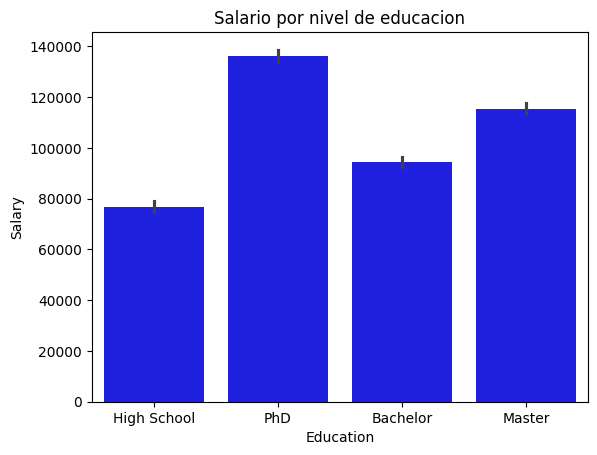

In [8]:
sns.barplot(y = "Salary", x = "Education", data=df, estimator = np.mean,color='blue')
plt.title("Salario por nivel de educacion")

In [9]:
df.groupby('Education')['Salary'].mean()

Education
Bachelor        94611.826959
High School     76849.037288
Master         115477.303078
PhD            136235.368399
Name: Salary, dtype: float64

# Relación del salario con la locación
Esta relacion se puede ver gracias a los datos y es interesante ver como se distribuye el dinero que gana cada persona dependiendo su ubicación, esto no es algo nuevo, esto puede tener muchas causas y si la relacionamos con nuestro anterior descubrimiento podriamos decir que se debe que en las zonas urbanas hay mas escuelas, universidades, oportunidades laborales, etc.
Por lo cual la causa puede ser diversa sin embargo es algo bastante alentador que la diferencia no sea tanta.

In [10]:
PhD_level = df[(df['Education']=='PhD')]

Agrupando los datos me di cuenta que esto tambien se puede deber al nivel de experiencia ya que las personas de la zona urbana tienden a tener mas experiencia que las demas zonas, eto lo hice basandome en el nivel más alto de ducación.

In [11]:
PhD_level.groupby('Location')['Experience'].mean()

Location
Rural       13.535714
Suburban    15.652174
Urban       16.466667
Name: Experience, dtype: float64

In [12]:
PhD_level.groupby('Location')['Salary'].mean()

Location
Rural       132108.164999
Suburban    136489.274773
Urban       140546.377722
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Salario por region ')

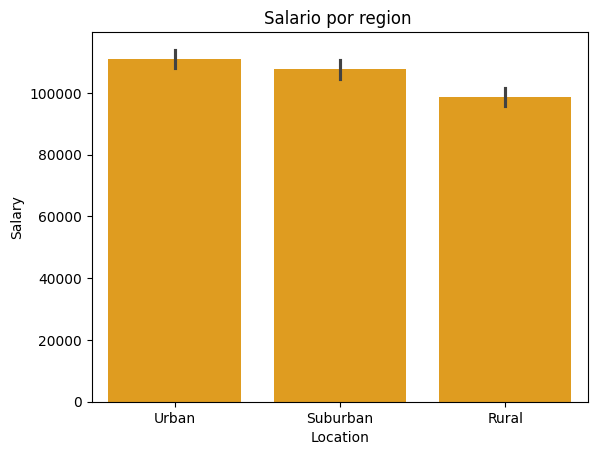

In [13]:
sns.barplot(y = "Salary", x = "Location", data=df, estimator = np.mean,color='orange')
plt.title("Salario por region ")

In [14]:
df.groupby('Location')['Salary'].mean()

Location
Rural        98677.346540
Suburban    107603.371820
Urban       110940.504531
Name: Salary, dtype: float64

# Relación del salario dependiendo la Profesión
Aqui nos podemos dar cuenta de que existe poca variedad de profesiones y sin embargo la brecha de un trabajo a otro es bastante notable, puede ser por varias causas como la experiencia, el nivel de educacion o simplemente por el trabajo como tal.

In [15]:
#nivel de experiencia medio por profesion
df.groupby('Job_Title')['Experience'].mean()

Job_Title
Analyst     13.827451
Director    14.789091
Engineer    15.467249
Manager     15.087137
Name: Experience, dtype: float64

Text(0.5, 1.0, 'Salario por profesion')

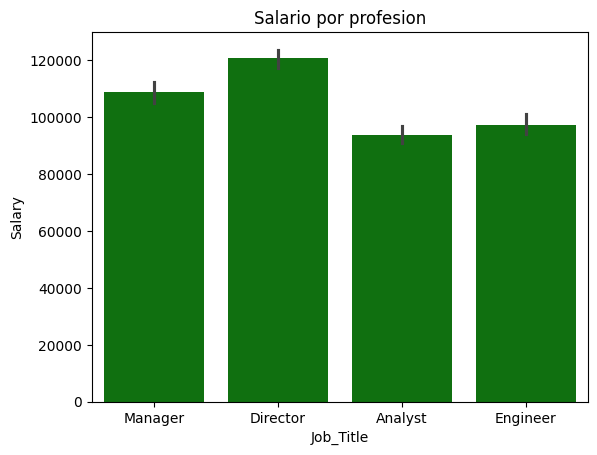

In [16]:
sns.barplot(y = "Salary", x = "Job_Title", data=df, estimator = np.mean,color='green')
plt.title("Salario por profesion")

In [17]:
df.groupby('Job_Title')['Salary'].mean()

Job_Title
Analyst      93801.761223
Director    120580.595991
Engineer     97266.358019
Manager     108735.664908
Name: Salary, dtype: float64

# Relacion del salario por genero
Esto es casi siempre bastante polemico, sin embargo en el dataset que estamos trabajando no vemos que exista una gran brecha salarial, podriamos decir que es mas bien una bastante balanceada.

Text(0.5, 1.0, 'Salario por genero')

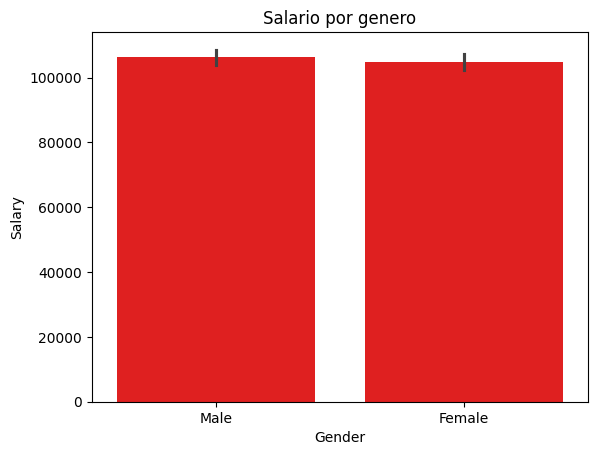

In [18]:
sns.barplot(y = "Salary", x = "Gender", data=df, estimator = np.mean,color='red')
plt.title("Salario por genero")

In [19]:
df.groupby('Gender')['Salary'].mean()

Gender
Female    104736.826181
Male      106329.031719
Name: Salary, dtype: float64

# Preprocesando los datos usando label encoder
Esto se debe a que tenemos varias variables categoricas las cuales debemos pasar a variables numericas para que el modelo puede generalizar y entrenarse de una mejor manera, esto lo que hace es asignar un valor especifico a cada categoria.


In [20]:
categoricals = ["Education", "Location", "Job_Title", "Gender"]

In [21]:
dfp = df.copy()

In [22]:
le = LabelEncoder()
for i in categoricals:
    dfp[i] = le.fit_transform(dfp[i])

In [23]:
dfp

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,1,8,2,3,63,1,84620.053665
1,3,11,1,1,59,1,142591.255894
2,0,28,1,3,61,0,97800.255404
3,1,29,0,1,45,1,96834.671282
4,3,25,2,0,26,0,132157.786175
...,...,...,...,...,...,...,...
995,1,8,1,0,25,0,64683.389864
996,1,24,2,2,30,0,74468.205020
997,2,18,0,0,44,1,98207.026024
998,0,27,1,1,31,0,108544.922720


#Dividimos nuestros datos entre las caracteristicas y el dato a predecir

In [24]:
x = dfp.drop(columns="Salary").values
y = dfp['Salary'].values
y = y.reshape(-1, 1)

#### Usamos MinMaxScaler para transformar las variables del conjunto de datos a un rango específico, asegurando que todas las variables estén en una escala similar.

In [25]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)
#pasamos a y como un valor unidimensional ya que esto nos puede ayudar a que el modelo funcione mejor
y = y.ravel()

In [26]:
#Dividimos los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.27)

# Radom forest Regressor

In [27]:
rf_model = RandomForestRegressor(random_state=40)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

# Metricas Radom forest Regressor

Estas metricas van a indicar que tan bien esta funcionando el modelo, ademas de eso abajo esta una grafica donde se puede observar graficamente una linea negra la que indica la forma que deberian tener los datos, lo que indica que entre mas pegados esten los puntos a la linea de referencia el modelo representara una mayor precision o lo mismo que decir que tiende a equivocarse menos

In [28]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.0050275139320620854
R^2 Score: 0.8490278699385092


Text(0, 0.5, 'y_pred')

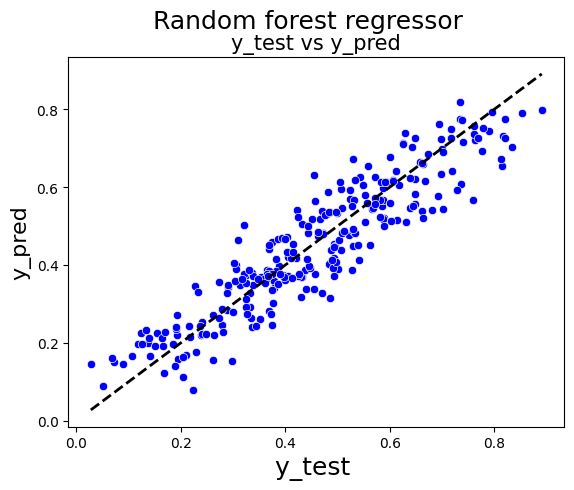

In [35]:
fig = plt.figure()
sns.scatterplot(x = y_test, y = y_pred, color = "Blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
fig.suptitle('Random forest regressor', fontsize=18)
plt.title('y_test vs y_pred', fontsize=15)
plt.xlabel('y_test ', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

# Linear Regressor

In [37]:
ln = LinearRegression()
ln.fit(x_train,y_train)
y_pred2 = ln.predict(x_test)

# Metricas Linear Regressor

Estas metricas van a indicar que tan bien esta funcionando el modelo, ademas de eso abajo esta una grafica donde se puede observar graficamente una linea negra la que indica la forma que deberian tener los datos, lo que indica que entre mas pegados esten los puntos a la linea de referencia el modelo representara una mayor precision o lo mismo que decir que tiende a equivocarse menos

In [38]:
mse = mean_squared_error(y_test, y_pred2)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred2)
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.013834566584864476
R^2 Score: 0.5845592843662514


Text(0, 0.5, 'y_pred2')

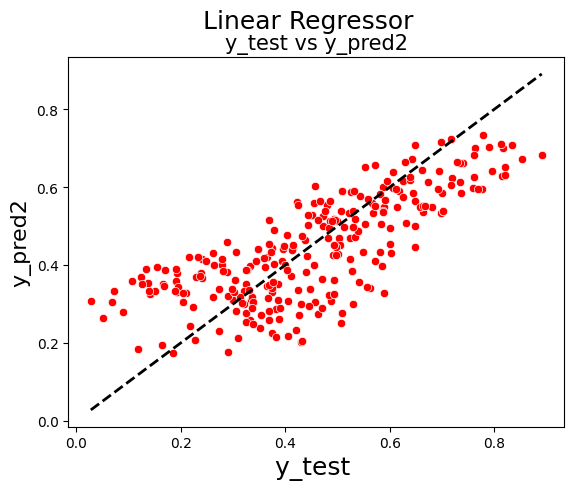

In [40]:
fig = plt.figure()
sns.scatterplot(x = y_test, y = y_pred2, color = "red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
fig.suptitle('Linear Regressor', fontsize=18)
plt.title('y_test vs y_pred2', fontsize=15)
plt.xlabel('y_test ', fontsize=18)
plt.ylabel('y_pred2', fontsize=16)

# Decision Tree Regressor

In [41]:
thr = DecisionTreeRegressor()
thr.fit(x_train, y_train)
y_pred3 = thr.predict(x_test)

# Metricas Decision Tree Regressor



Estas metricas van a indicar que tan bien esta funcionando el modelo, ademas de eso abajo esta una grafica donde se puede observar graficamente una linea negra la que indica la forma que deberian tener los datos, lo que indica que entre mas pegados esten los puntos a la linea de referencia el modelo representara una mayor precision o lo mismo que decir que tiende a equivocarse menos

In [42]:
mse = mean_squared_error(y_test, y_pred3)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred3)
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.008629260159384608
R^2 Score: 0.7408703775421053


Text(0, 0.5, 'y_pred3')

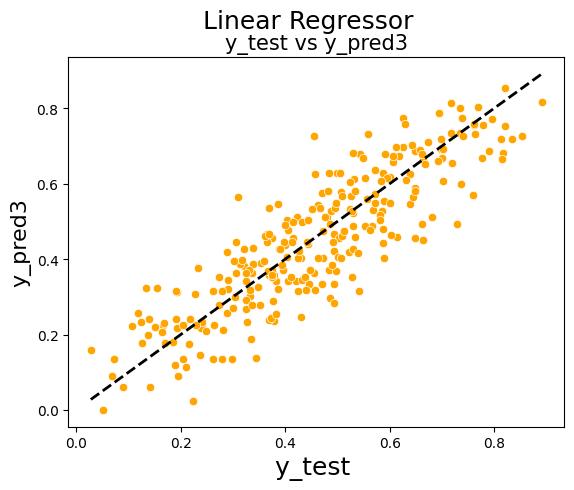

In [43]:
fig = plt.figure()
sns.scatterplot(x = y_test, y = y_pred3, color = "orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
fig.suptitle('Linear Regressor', fontsize=18)
plt.title('y_test vs y_pred3', fontsize=15)
plt.xlabel('y_test ', fontsize=18)
plt.ylabel('y_pred3', fontsize=16)

# Conclusión
como conclusión de este analisis se podría decir que el modelo que menos tiende a equivocarse es el Radom forest Regressor ya que tiene un buen rendimiento esto respaldado por su mse, y el r^2 score, y como vemos en la su respectiva grafica es la mas acertada en sus predicciones, aunque obtuvimos un buen puntaje muchas veces este puede no ser suficiente, por lo cual nos queda mucho por mejorar tanto como en el preprocesamiento, como en la seleccion de modelos y sus hiper-parametros sin embargo es un buen inicio, ya iremos implementando mejoras con el paso del tiempo.